In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pickle

In [4]:
df=pd.read_csv("../data/Dry_Bean.csv")

In [5]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [6]:
# Encode the target variable 'Class' into numbers (0-6)
label_encoder = LabelEncoder()
df['Class_Encoded'] = label_encoder.fit_transform(df['Class'])

# Define Features (X) and Target (y)
y = df['Class_Encoded']
X = df.drop(['Class', 'Class_Encoded'], axis=1)

In [7]:
# Split the data into training and testing sets
# I'm using stratify=y to ensure the class distribution is the same in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# --- 2. Train the Logistic Regression Model ---
# I'm increasing max_iter to ensure the model converges with this large dataset.
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [9]:
# --- 3. Evaluate the Model ---
# Make predictions on the unseen test data
y_pred = model.predict(X_test_scaled)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Model Accuracy: 0.9207

Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.89      0.92       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.94      0.94       326
    DERMASON       0.92      0.91      0.92       709
       HOROZ       0.96      0.95      0.96       386
       SEKER       0.93      0.95      0.94       406
        SIRA       0.85      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



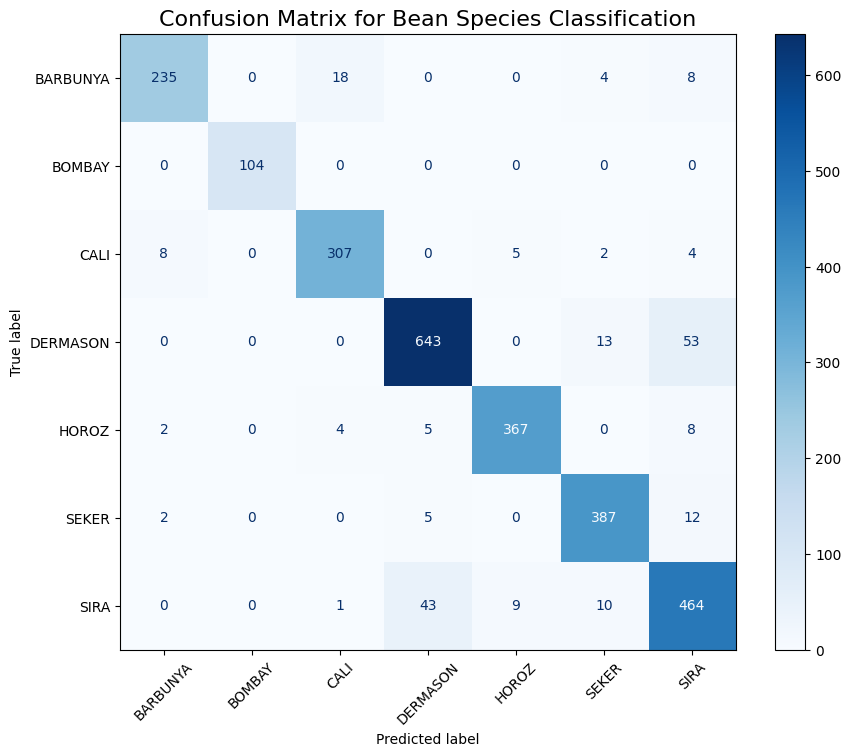

In [16]:
# --- 4. Visualize the Confusion Matrix ---
# This will show me how well the model distinguishes between the 7 bean species.
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm, display_labels=label_encoder.classes_)

fig, ax = plt.subplots(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix for Bean Species Classification', fontsize=16)
plt.xticks(rotation=45)
plt.savefig('../images/03_confusion_matrix.png')
plt.show()

Based on this confusion matrix, my analysis is that the model is highly accurate but not perfect.

Excellent Performance on Most Classes: The model performs exceptionally well for most species. It perfectly classifies all BOMBAY beans and is nearly perfect for DERMASON and HOROZ. The strong diagonal line shows that the majority of predictions are correct.

Specific Areas of Confusion: The most significant errors occur when the model confuses the SIRA and DERMASON species. It incorrectly predicted 43 SIRA beans as DERMASON. This suggests that these two bean types have very similar physical measurements, making them difficult for the model to distinguish.

In short, the model is very effective, with an overall accuracy likely above 90%, but it struggles to differentiate between a few visually similar bean species.

In [15]:
with open('../bean_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('../scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

with open('../label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

# I also need to save the feature columns in the correct order
features = X.columns.tolist()
with open('../features.pkl', 'wb') as f:
    pickle.dump(features, f)

# And the median values for sensible defaults in the app
feature_medians = X.median()
with open('../feature_medians.pkl', 'wb') as f:
    pickle.dump(feature_medians, f)